<a href="https://colab.research.google.com/github/akhavan12/discrete_covid_model/blob/master/Discrete_Model_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive
from ipywidgets import GridspecLayout
from ipywidgets import FloatSlider
pd.options.display.max_rows = 999


### Actual Data From <font color=#800000> Italy</font>

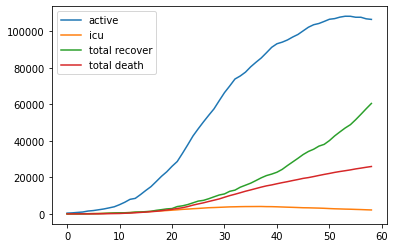

In [304]:
df_Italy = pd.read_excel('https://github.com/akhavan12/discrete_covid_model/raw/master/Country_Trends.xlsx',sheet_name='Italy')
#df_Italy[['total case','icu','total recover','total death']]
df_Italy[['active','icu','total recover','total death']].plot()

Simple SEIR for the start

In [305]:
df_Italy.head(1)

,Italy,new case,total case,new death,total death,icu,active,total recover,new test,total test
0,2020-02-26,143,466,2,12,36,430,3,987,9587


In [0]:
def Interactive_discrete(epsilon,Beta,recovery):
  N=60E5
  S = [N-466]
  E = [400*2]
  I = [466]
  R = [3]
  for i in range(1,60):
    S_t = S[i-1] - Beta * (I[i-1]*S[i-1])/N  
    E_t = Beta * I[i-1]*S[i-1]/N  - epsilon * E[i-1]
    I_t = I[i-1] + epsilon * E[i-1] - recovery * I[i-1]
    R_t = R[i-1] +  recovery * I[i-1]


    S.append(S_t)
    E.append(E_t)
    I.append(I_t)
    R.append(R_t)
  f,ax = plt.subplots(2,2,figsize=(8,6))
  axs=ax.ravel()
  axs[0].plot(I,label='Model')
  axs[0].plot(df_Italy['active'],label='Actual')
  axs[0].legend()

In [0]:
step_size=.001


w = interactive(Interactive_discrete,    
    epsilon = FloatSlider(min=.01, max=1,continuous_update=False, readout_format='.3f',   step=step_size, value=.526, description = 'Epsilon') 
    ,Beta = FloatSlider(min=.01, max=4,continuous_update=False, readout_format='.3f',   step=step_size, value=1.681,description = 'β')  
    ,recovery = FloatSlider(min=.01, max=1,continuous_update=False, readout_format='.3f',   step=step_size, value=0.413,))

In [308]:
w

interactive(children=(FloatSlider(value=0.526, continuous_update=False, description='Epsilon', max=1.0, min=0.…

In [0]:
### kernel integration method

In [0]:
MaxTime = 60
L=1
N=60E5

### M,R,Severe
Probs["M"] = [[0.8,0.00,.20], #0
          [0.80,0.00,.20], #1
          [0.80,0.00,.20], #2
          [0.70,0.10,.20], #3
          [0.60,0.25,.15], #4
          [0.50,0.25,.25], #5
          [0.30,0.20,.50], #6
          [0.30,0.20,.50], #7
          [0.30,0.20,.50], #8
          [0.10,0.30,.60], #9
          [0.05,0.05,.90], #10
          [0.05,0.05,.90], #11
          [0.05,0.05,.90], #12
          [0.05,0.05,.90], #13
          [0.00,0.00,1.00]] #14

### W,R,V,D
Probs["Severe"] = [
          [0.50,0.20,0.28,0.00], #0
          [0.40,0.30,0.28,0.02], #1
          [0.40,0.30,0.28,0.02], #2
          [0.40,0.30,0.28,0.02], #3
          [0.40,0.30,0.28,0.02], #4
          [0.40,0.30,0.28,0.02], #5
          [0.50,0.30,0.18,0.02], #6
          [0.50,0.30,0.18,0.02], #7
          [0.50,0.30,0.18,0.02], #8
          [0.50,0.30,0.18,0.02], #9
          [0.50,0.30,0.18,0.02], #10
          [0.40,0.40,0.18,0.02], #11
          [0.40,0.40,0.18,0.02], #12
          [0.30,0.80,0.18,0.02], #13
          [0.00,1,0.00,0.00]] #14

### V,R,D 
Probs["ventilator"] = [
          [0.50,0.30,0.20], #0
          [0.40,0.30,0.30], #1
          [0.40,0.30,0.30], #2
          [0.40,0.30,0.30], #3
          [0.40,0.30,0.30], #4
          [0.40,0.30,0.30], #5
          [0.40,0.30,0.30], #6
          [0.40,0.30,0.30], #7
          [0.40,0.30,0.30], #8
          [0.40,0.30,0.30], #9
          [0.40,0.30,0.30], #10
          [0.40,0.30,0.30], #11
          [0.20,0.30,0.50], #12
          [0.20,0.30,0.50], #13
          [0.00,0.20,0.8]] #14
### Symp,H,M
Probs['Symp'] =[[0.50,.20,.30], #0
                [0,0.1,0.9], #1
         ]
### E,H,Symp
Probs["E"] =[[0.50,0.30,0.20], #0
         [0.50,0.30,0.20], #1
         [0.40,0.20,0.40], #2
         [0.30,0.10,0.60], #3
         [0.20,0.10,0.70], #4
         [0.00,0.10,0.90]] #5



In [0]:
H=np.zeros(60) ## healthy population has 1 class
E=np.zeros([5,60]) ## Exposed population has 5 classes
H[0]=N
E[0,0]=1000
Beta = 3

Symp=np.zeros([2,60]) ## Sympt population has 2 classes
M=np.zeros([15,60]) ## Mild population has 14 classes
M[0,0]=100
Symp[0,0]=100
V=np.zeros([15,60]) ## Ventilator population has 14 classes
W=np.zeros([15,60]) ## Severe population has 14 classes
R=np.zeros(60) ## Recovered population has 1 class
D=np.zeros(60) ## Dead population has 1 class

In [0]:

for t in range(MaxTime-1):
  
 
  E[0,t+1] = np.int32(((H[t] * (np.sum(M[:,t])+np.sum(W[:,t])))/N)* Beta)


## Each state represents time from onset in one conditions (E,Symp,M,W,V)
## when moving from one day to another, the states increment (E(t) -> E(t+1))
## the change or staying in each condition, and state has it's own probability

#H -- > E[ state 0, time t]--> P_E(state,E) --> + E(State 1, t+1)
#                          --> P_E(state,Symp) --> + Symp(State 0, t+1)
#                          --> P_H(state,H) --> + H(t+1)
#S(state=1,t) -- > M(state=0,t+1) --P_M(state=1~14,M)-- > M(state=1,t+2)
#                                 --P_M(state=1~14,W)-- > W(state=1,t+2)-----|P_W(state=1~14,V) ---> V(state=0, t=t+3) -->| P_R(state=1~14,V) --> R
#                                 --P_M(state=1~14,R)-- > R(state=1,t+2)     |P_W(state=1~14,D) --->                      | P_D(state=1~14,V) --> D
#                                                                            |P_R(state=1~14,R) ---> 
# E(state 0,  t+1) = H(t)* (M + W)*Beta/N
# H(t+1) = H(t) - E(State 0, t+1)


 ### Exposed states
  for state in range(0,4):
    ## Stay exposed conditions
    E[state+1,t+1] =  E[state,t]*Probs["E"][state][0] 
    ## go back to healthy
    H[t+1] = H[t] + E[state,t]*Probs["E"][state][1]
    ## become symtomic
    Symp[0,t+1] =  E[state,t]*Probs["E"][state][2]
  
  
  ### Symptomatic states 
  #################################################
  Symp[1,t+1] = Symp[0,t]*Probs["Symp"][0][0]
  #################################################

  for state in range(0,14):
    ### M,R,Severe
    M[state+1,t+1] =  M[state,t]*Probs["M"][state][0]
    R[t+1] = R[t] + M[state,t]*Probs["M"][state][1]
    W[0,t+1] =  M[state,t]*Probs["M"][state][2]
    
  for state in range(0,14):
    ### Severe,R,V,D
    W[state+1,t+1] =  M[state,t]*Probs["Severe"][state][0]
    R[t+1] = R[t] + W[state,t]*Probs["Severe"][state][1]
    V[0,t+1] =  W[state,t]*Probs["Severe"][state][2]
    D[t+1] = D[t] + W[state,t]*Probs["Severe"][state][3]
  for state in range(0,14):
    ### V,R,D 
    V[state+1,t+1] =  V[state,t]*Probs["ventilator"][state][0]
    R[t+1] = R[t] + V[state,t]*Probs["Severe"][state][1]
    D[t+1] = D[t] + V[state,t]*Probs["Severe"][state][2]
  for state in range(0,14):
    ### V,R,D 
    V[state+1,t+1] =  V[state,t]*Probs["ventilator"][state][0]
    R[t+1] = R[t] + V[state,t]*Probs["Severe"][state][1]
    D[t+1] = D[t] + V[state,t]*Probs["Severe"][state][2]

  



